In [3]:
import numpy as np
import networkx as nx
from edge_fetch import edge_terrier
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import normalize
from featureAnalysis import featureSelection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib

In [4]:
# Initialize edgelist collector object
graph_collector = edge_terrier('/Users/paigefrank/Library/Python/3.6/bin/aws', 0, filepath='data/HNU1/ndmg_0-0-48/graphs/JHU/')
# Make a generator that yields all edgelists in filepath
filelist = graph_collector.convert_gpickle_all()
# Get a list of just the network x objects
graphList, fileList = graph_collector.getGraphs(filelist)

In [5]:
#Output feature matrix to a file
numFeatures = 3

#UNCOMMENT TO USE EIGENVECTOR CENTRALITY
# featureObj = featureSelection(graphList)
# X = featureObj.eigenvectorCentrality(numFeatures)
# mat = np.matrix(X, dtype = float)
# with open('outfileMat.txt','wb') as f:
#     for line in mat:
#         np.savetxt(f, line, fmt='%.2f')
# print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")

#UNCOMMENT TO USE EIGEN VALUES of LAPLACIAN
# featureObj = featureSelection(graphList)
# X = featureObj.calc_eigval_feature_matrix(numFeatures)
# mat = np.matrix(X, dtype = float)
# with open('outfileMat.txt','wb') as f:
#     for line in mat:
#         np.savetxt(f, line, fmt='%.2f')
# print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")

#UNCOMMENT TO USE KHOP
featureObj = featureSelection(graphList)
X = featureObj.getKhopFeatMat1(numFeatures)
mat = np.matrix(X, dtype = float)
with open('outfileMat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')
print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")


[5528.120523968787, 5637.2273244147127, 2867.3750167224089, 12566.991705685617, 422.93484949832794, 1633.4663433667786, 4216.4928762541804, 1602.1424637681171, 3360.4902898550718, 1585.5080824972122, 2049.2427647714621, 2121.1000668896327, 3852.8570234113722, 2572.3563433667769, 3708.2787513935341, 3565.6093199554066, 10.481337792642154, 6990.7402006689017, 11.863311036789312, 7332.3352842809363, 3.2710256410256435, 7073.5296655518414, 3.5772129319955321, 6529.6407915273167, 565.61899665551846, 20056.825540691203, 745.00667781493837, 15633.085841694528, 3507.846811594201, 2444.7302006688974, 3496.3345707915255, 2447.7220066889613, 1894.0956075808242, 1881.0489520624308, 1578.1643701226312, 1639.5233444816051, 2468.2505574135985, 1533.5349386845046, 2622.2600222965439, 1586.2438684503891, 3263.3472798216294, 2056.2943143812709, 3054.6878483835021, 2025.2916276477149, 550.79661092530625, 2945.3526309921967, 257.79424749163854, 2684.2333444816068, 3047.5206243032321, 1531.9336789297672, 2

In [6]:
matrix = open('outfileSimMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)

In [7]:
#Function to verify clusters


#collect correct labels:
correctLabels = []
for item in fileList:
    correctLabels.append(float(item[4:11]) - 25426.0)

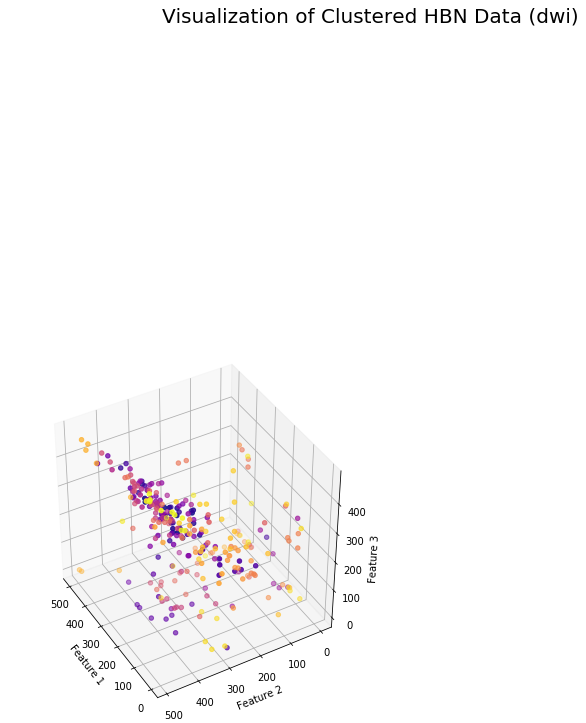

In [8]:
#Graph the data if the features are less than 3 dimensions


if (numFeatures ==2):
    fig = plt.figure(3, figsize=(10, 10))
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)

    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(correctLabels)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    #labels = np.ones((0,97))
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
if (numFeatures ==3):
    fig = plt.figure(3, figsize=(10, 10))
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=correctLabels, cmap = "plasma")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

In [9]:
#Cluster with affinity Propogation for multiple parameters

maxDamp = 0
maxPreproc = 0
maxSil = 0
preproc = 0
for i in range(1, 5):
    #vary the preference value
    preproc = preproc + .01
    for j in range(5, 10):
        #vary the damping value
        damp = .1 * j
        af = AffinityPropagation(damping = damp, preference = preproc,affinity="precomputed").fit(inputMat)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters = len(cluster_centers_indices)
        ss = silhouette_score(inputMat, labels)
        print('|Preference |% 1.2f' % preproc, "| Damping | % 1.1f" % damp,"| Clusters | ", n_clusters, "| Silhouette | % 1.3f" % ss, "|")
        
        #capture max preproc and damping
        if (ss > maxSil):
            maxDamp = damp
            maxPreproc = preproc
            maxSil = ss
print("Best Damping Value:", maxDamp, "Best Preference Value:", maxPreproc)

|Preference | 0.01 | Damping |  0.5 | Clusters |  68 | Silhouette |  0.095 |
|Preference | 0.01 | Damping |  0.6 | Clusters |  68 | Silhouette |  0.095 |
|Preference | 0.01 | Damping |  0.7 | Clusters |  68 | Silhouette |  0.095 |
|Preference | 0.01 | Damping |  0.8 | Clusters |  68 | Silhouette |  0.095 |
|Preference | 0.01 | Damping |  0.9 | Clusters |  67 | Silhouette |  0.096 |
|Preference | 0.02 | Damping |  0.5 | Clusters |  69 | Silhouette |  0.097 |
|Preference | 0.02 | Damping |  0.6 | Clusters |  69 | Silhouette |  0.097 |
|Preference | 0.02 | Damping |  0.7 | Clusters |  69 | Silhouette |  0.097 |
|Preference | 0.02 | Damping |  0.8 | Clusters |  69 | Silhouette |  0.098 |
|Preference | 0.02 | Damping |  0.9 | Clusters |  69 | Silhouette |  0.098 |
|Preference | 0.03 | Damping |  0.5 | Clusters |  73 | Silhouette |  0.099 |
|Preference | 0.03 | Damping |  0.6 | Clusters |  72 | Silhouette |  0.099 |
|Preference | 0.03 | Damping |  0.7 | Clusters |  71 | Silhouette |  0.098 |

In [11]:
#isolate best clustering output
af = AffinityPropagation(damping = maxDamp, preference = maxPreproc,affinity="precomputed").fit(inputMat)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters = len(cluster_centers_indices)


#create a dictionary of labels and nodes
nodeDict = dict(enumerate(labels))
#sort the nodes so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)




#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0,len(s)):
        node2 = s[j]
        sortedSimMat[i][j] = inputMat[node, node2]

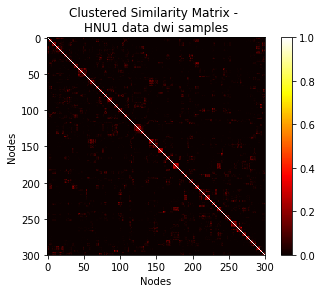

In [12]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.title("Clustered Similarity Matrix - \nHNU1 data dwi samples")
plt.show()

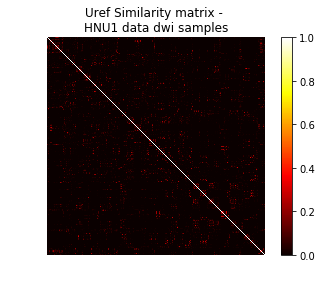

In [13]:
#create a heat map of the sorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Graphs')
plt.ylabel('Graphs')
plt.title("Uref Similarity matrix - \nHNU1 data dwi samples")
plt.axis('off')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, correctLabels)

0.016666666666666666

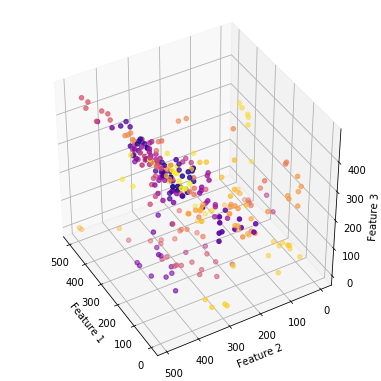

In [15]:
#Create a plot of the clusters color-coded as such

if (numFeatures ==2):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(labels)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    #labels = np.ones((0,97))
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
if (numFeatures ==3):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=labels, cmap = "plasma")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    